# Heart Failure Prediction

## Importing the Libraries

In [596]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

## Importing the Dataset

In [597]:
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")

We have now imported the dataset. So, now lets check the content of the dataset.

In [598]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [599]:
dataset.shape

(299, 13)

This shows that there are 299 rows and 13 columns.

In [600]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Our dataset is free from null value.

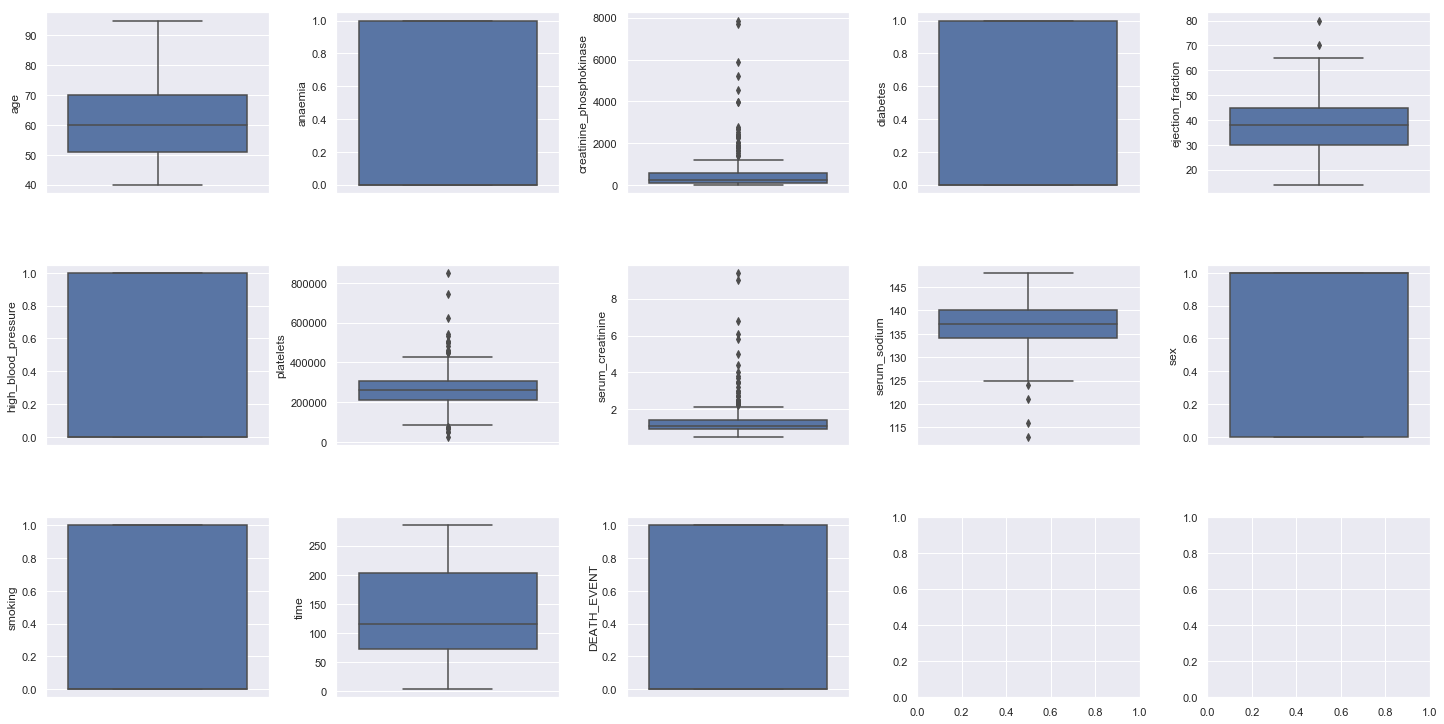

In [601]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=v, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)
plt.show()

The above boxplot shows that columns creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine and serum_sodium are having outliner data. But before droping them lets fisrt visualize the data and find out the relation with our DEATH_EVENT label.

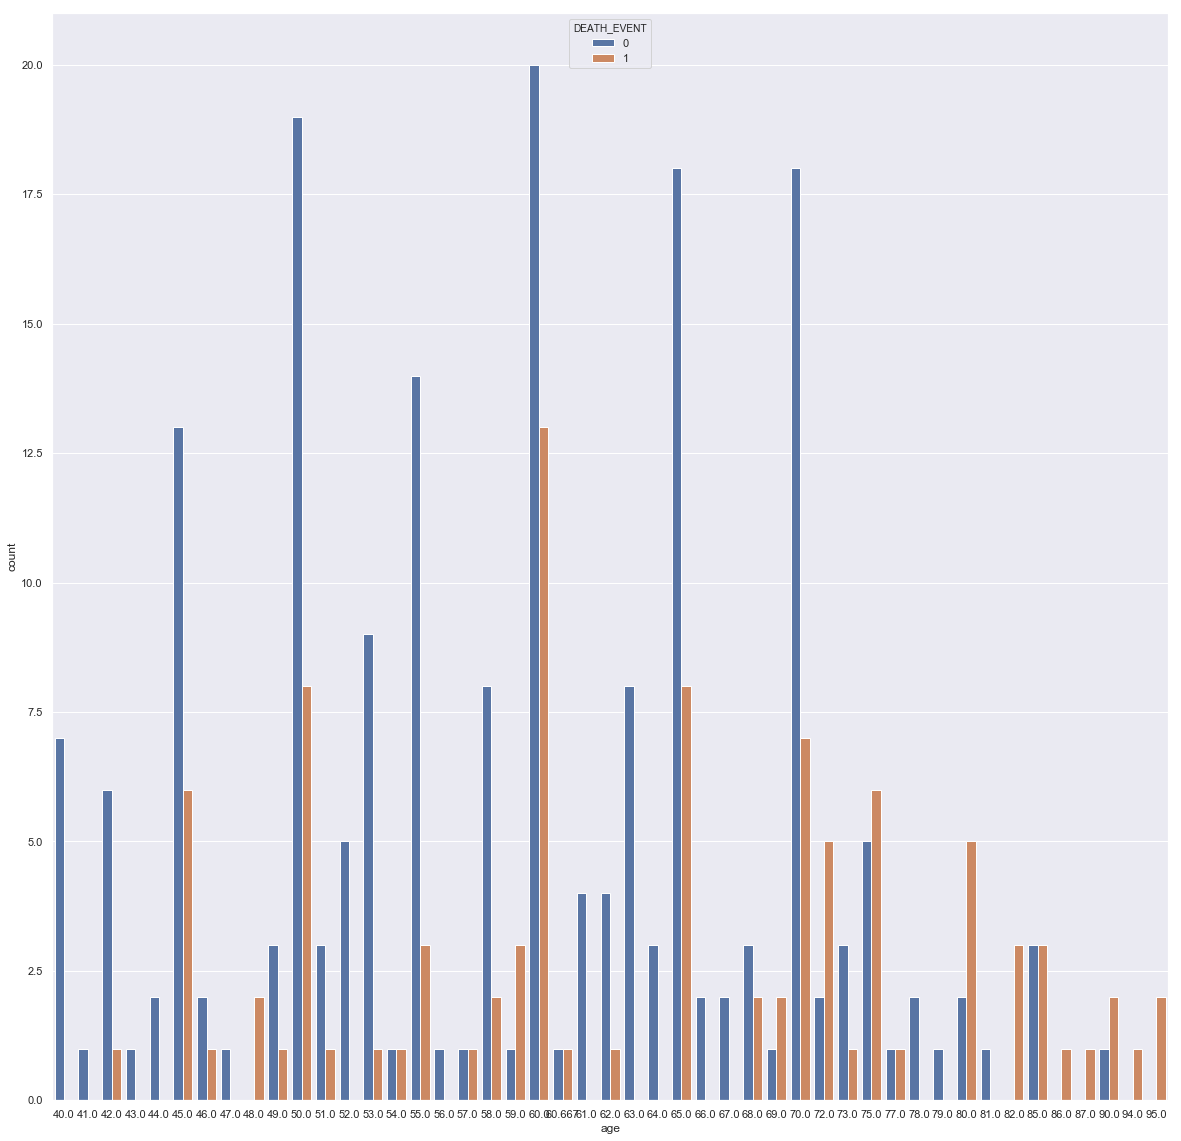

In [602]:
sns.set(rc={'figure.figsize':(20,20)})
sns.countplot("age", hue="DEATH_EVENT", data=dataset)

The above count plot clearly shows that the number of deaths depend on the age though not proportionally.

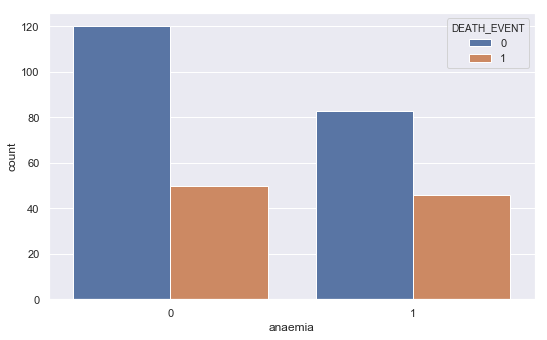

In [603]:
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.countplot("anaemia", hue="DEATH_EVENT", data=dataset)

The countplot of anaemia with respect to DEATH_EVENT shows that the death of a person does depend on the anemia as the total deaths among anaemic and non-anaemic people are constant compared to the total number of anaemic and non-anaemic person which is not constant.

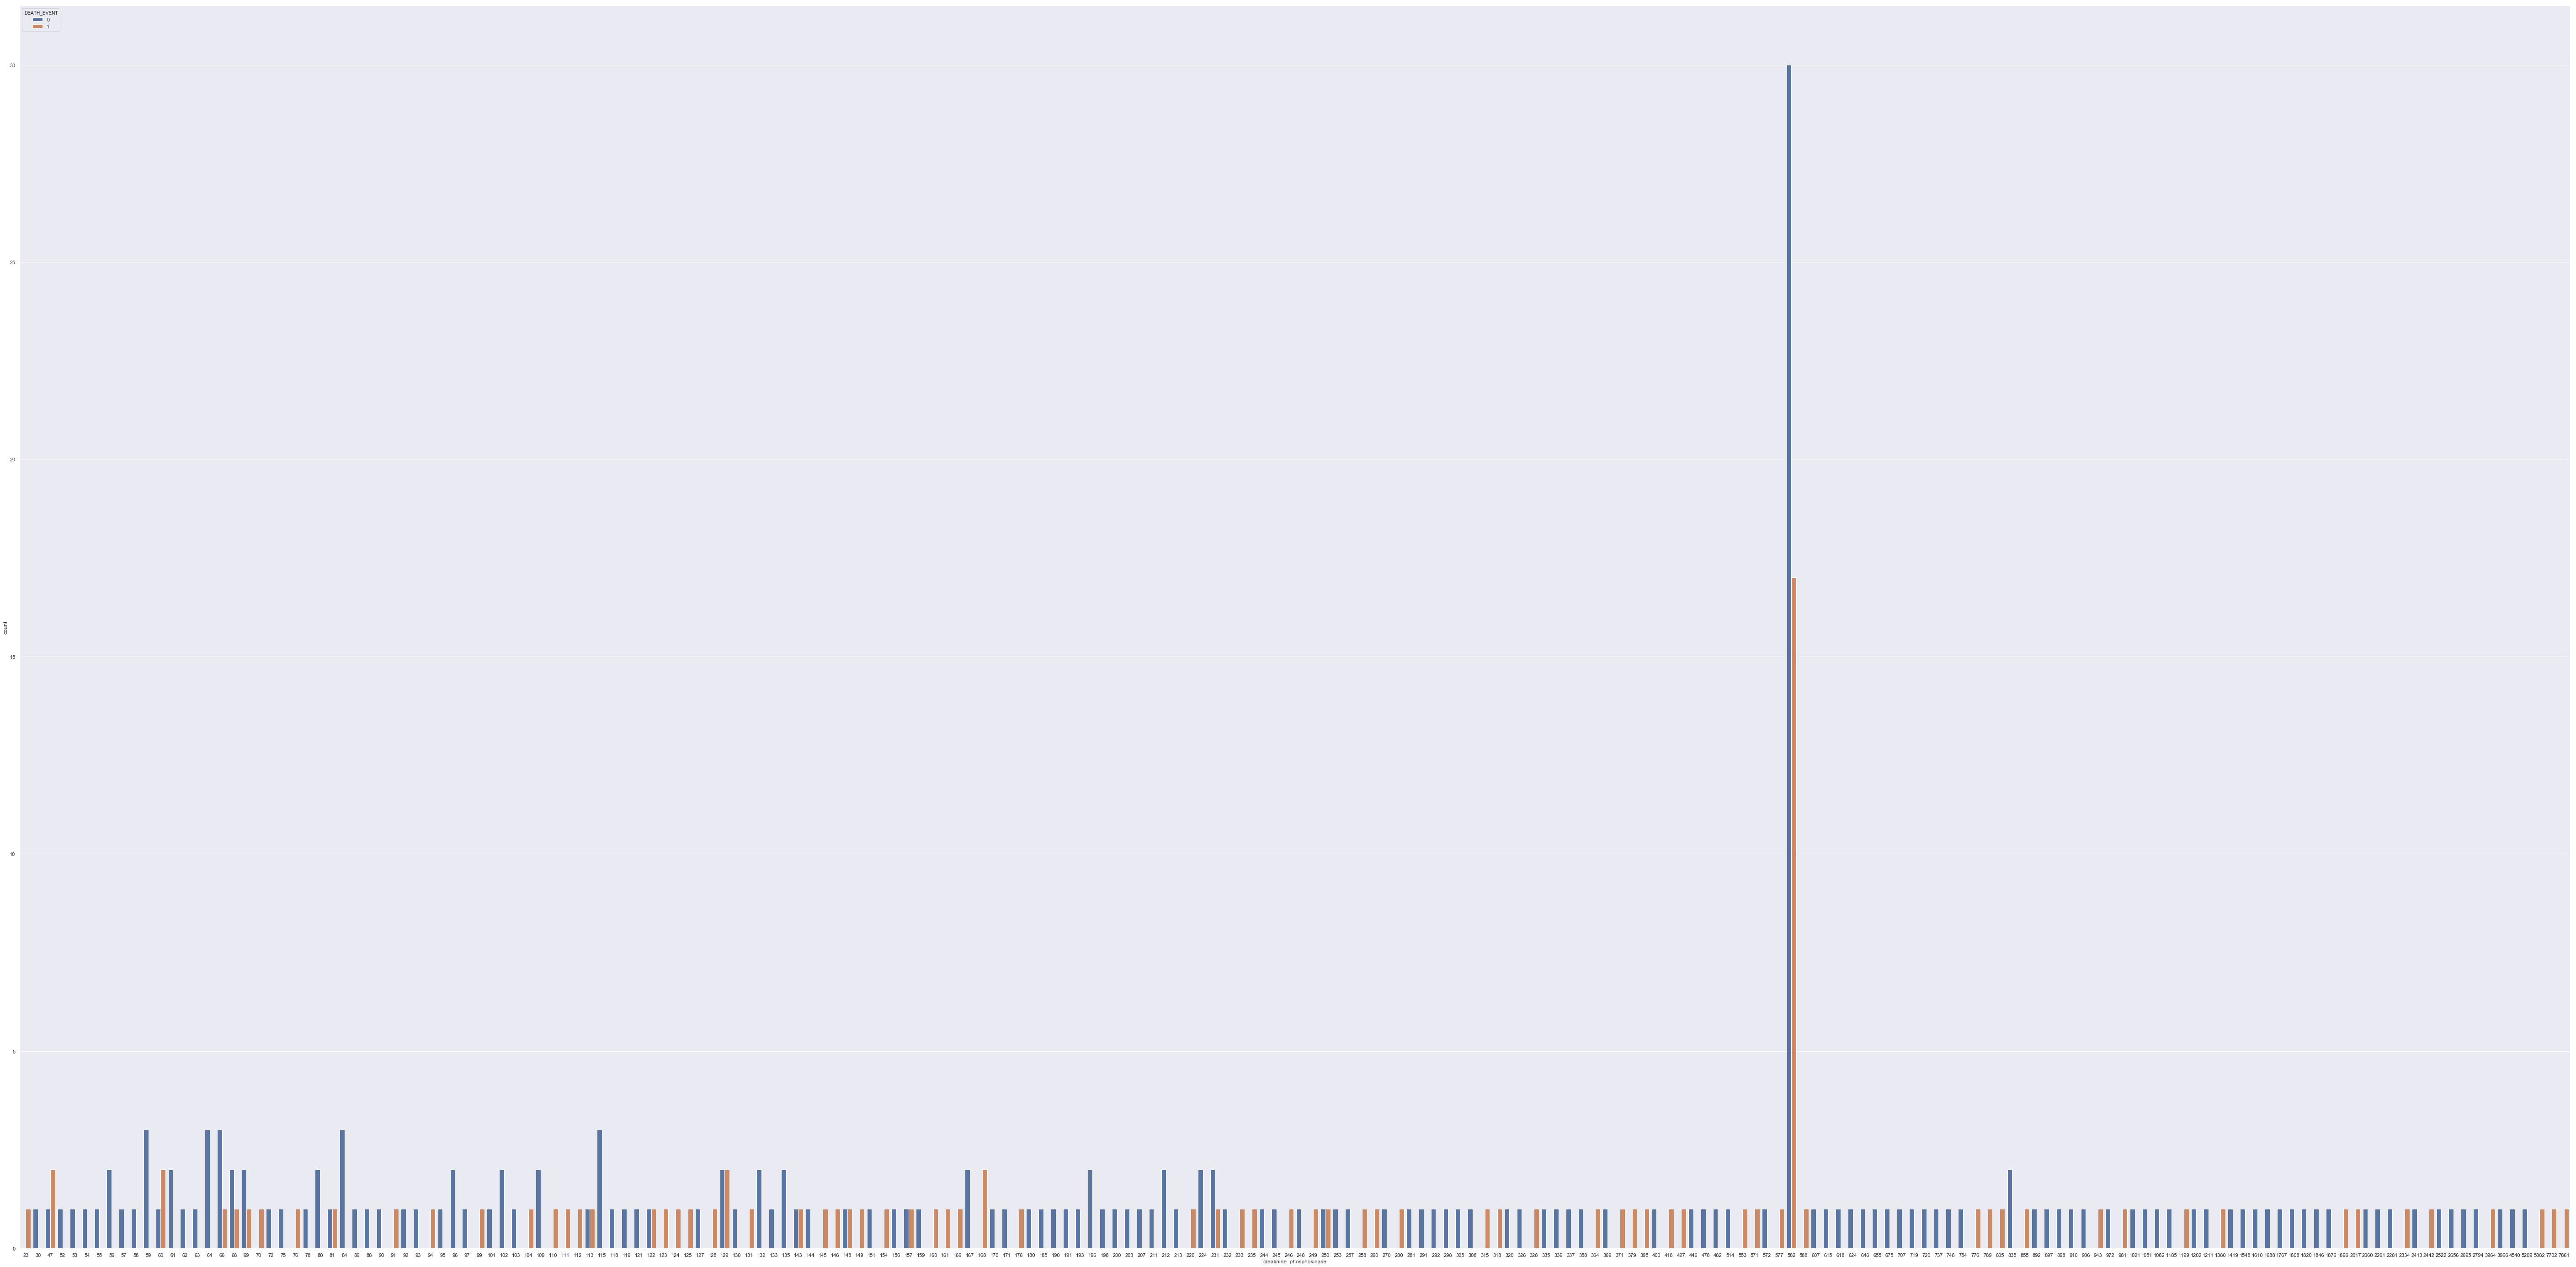

In [604]:
sns.set(rc={'figure.figsize':(100,50)})
sns.countplot("creatinine_phosphokinase", hue="DEATH_EVENT", data=dataset)

The countplot of creatinine_phosphokinase with respect to DEATH_EVENT shows that the death of a person does not depend on the amount of creatinine_phosphokinase as the death rate is quite constant with a lot of outliners which was also evident from the boxplot.

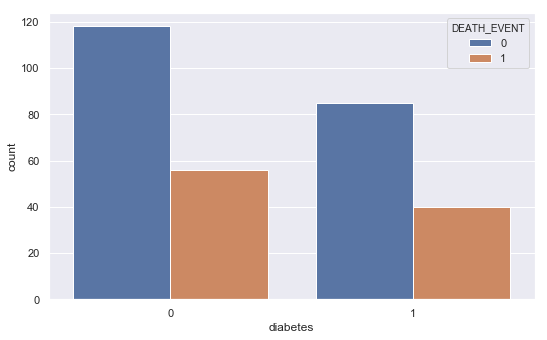

In [605]:
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.countplot("diabetes", hue="DEATH_EVENT", data=dataset)

The countplot of diabetes with respect to DEATH_EVENT shows that the death of a person does not depend on diabetes as the death rate is quite constant.

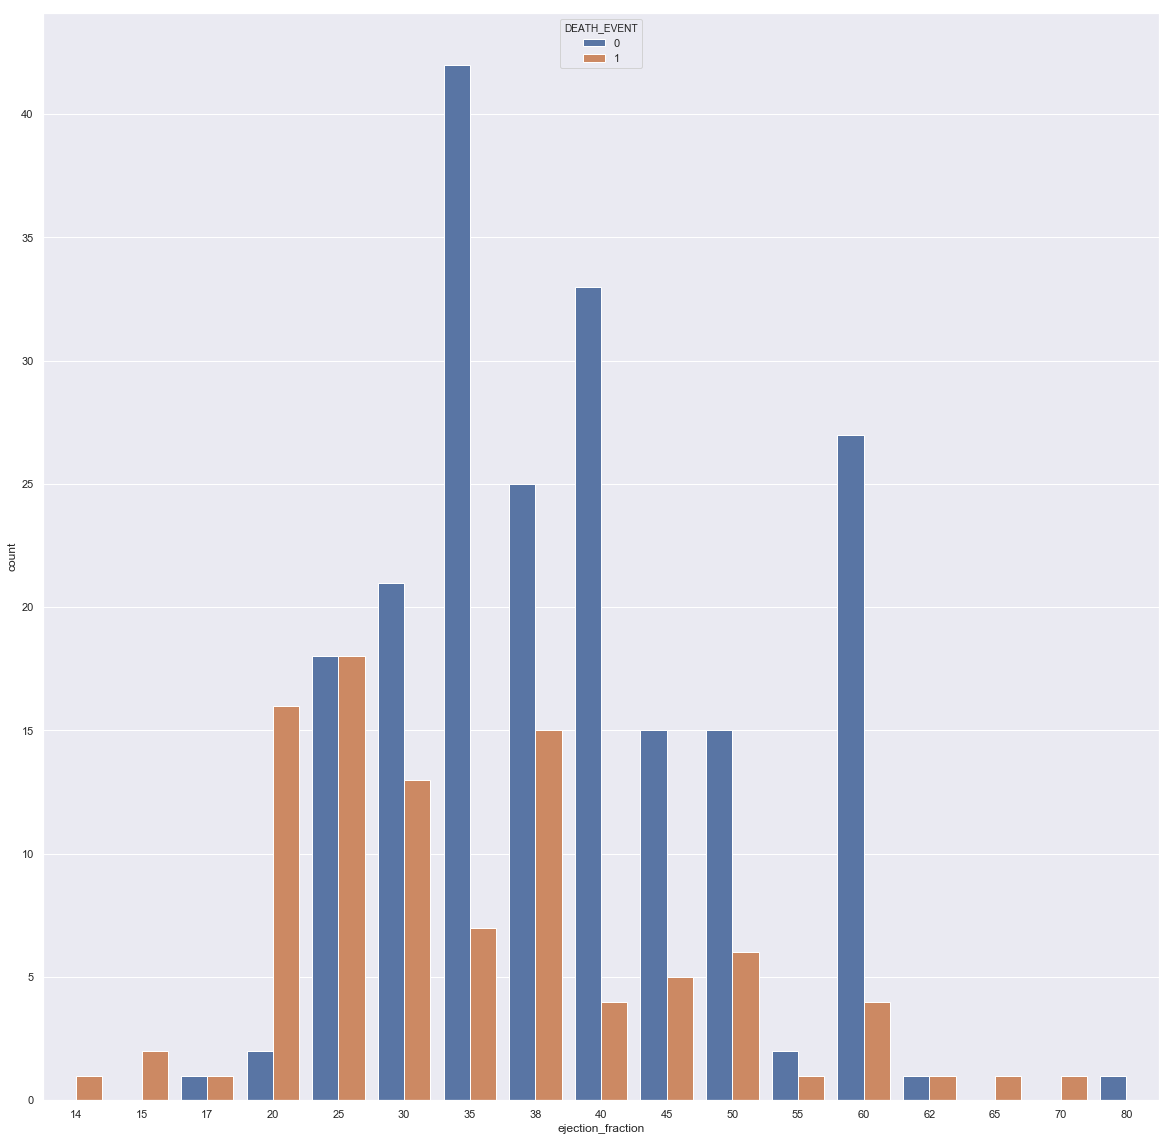

In [606]:
sns.set(rc={'figure.figsize':(20,20)})
sns.countplot("ejection_fraction", hue="DEATH_EVENT", data=dataset)

The count plot of ejection_fraction with respect to DEATH_EVENT shows that death of a person due to heart failure does depend on the ejection_fraction.

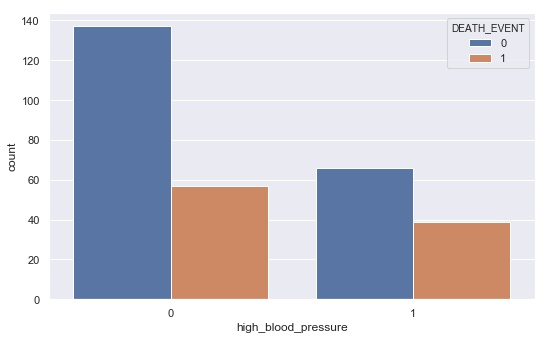

In [607]:
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.countplot("high_blood_pressure", hue="DEATH_EVENT", data=dataset)

The count plot of high_blood_pressure with respect to DEATH_EVENT shows that death of a person due to heart failure does not depend on the high_blood_pressure.

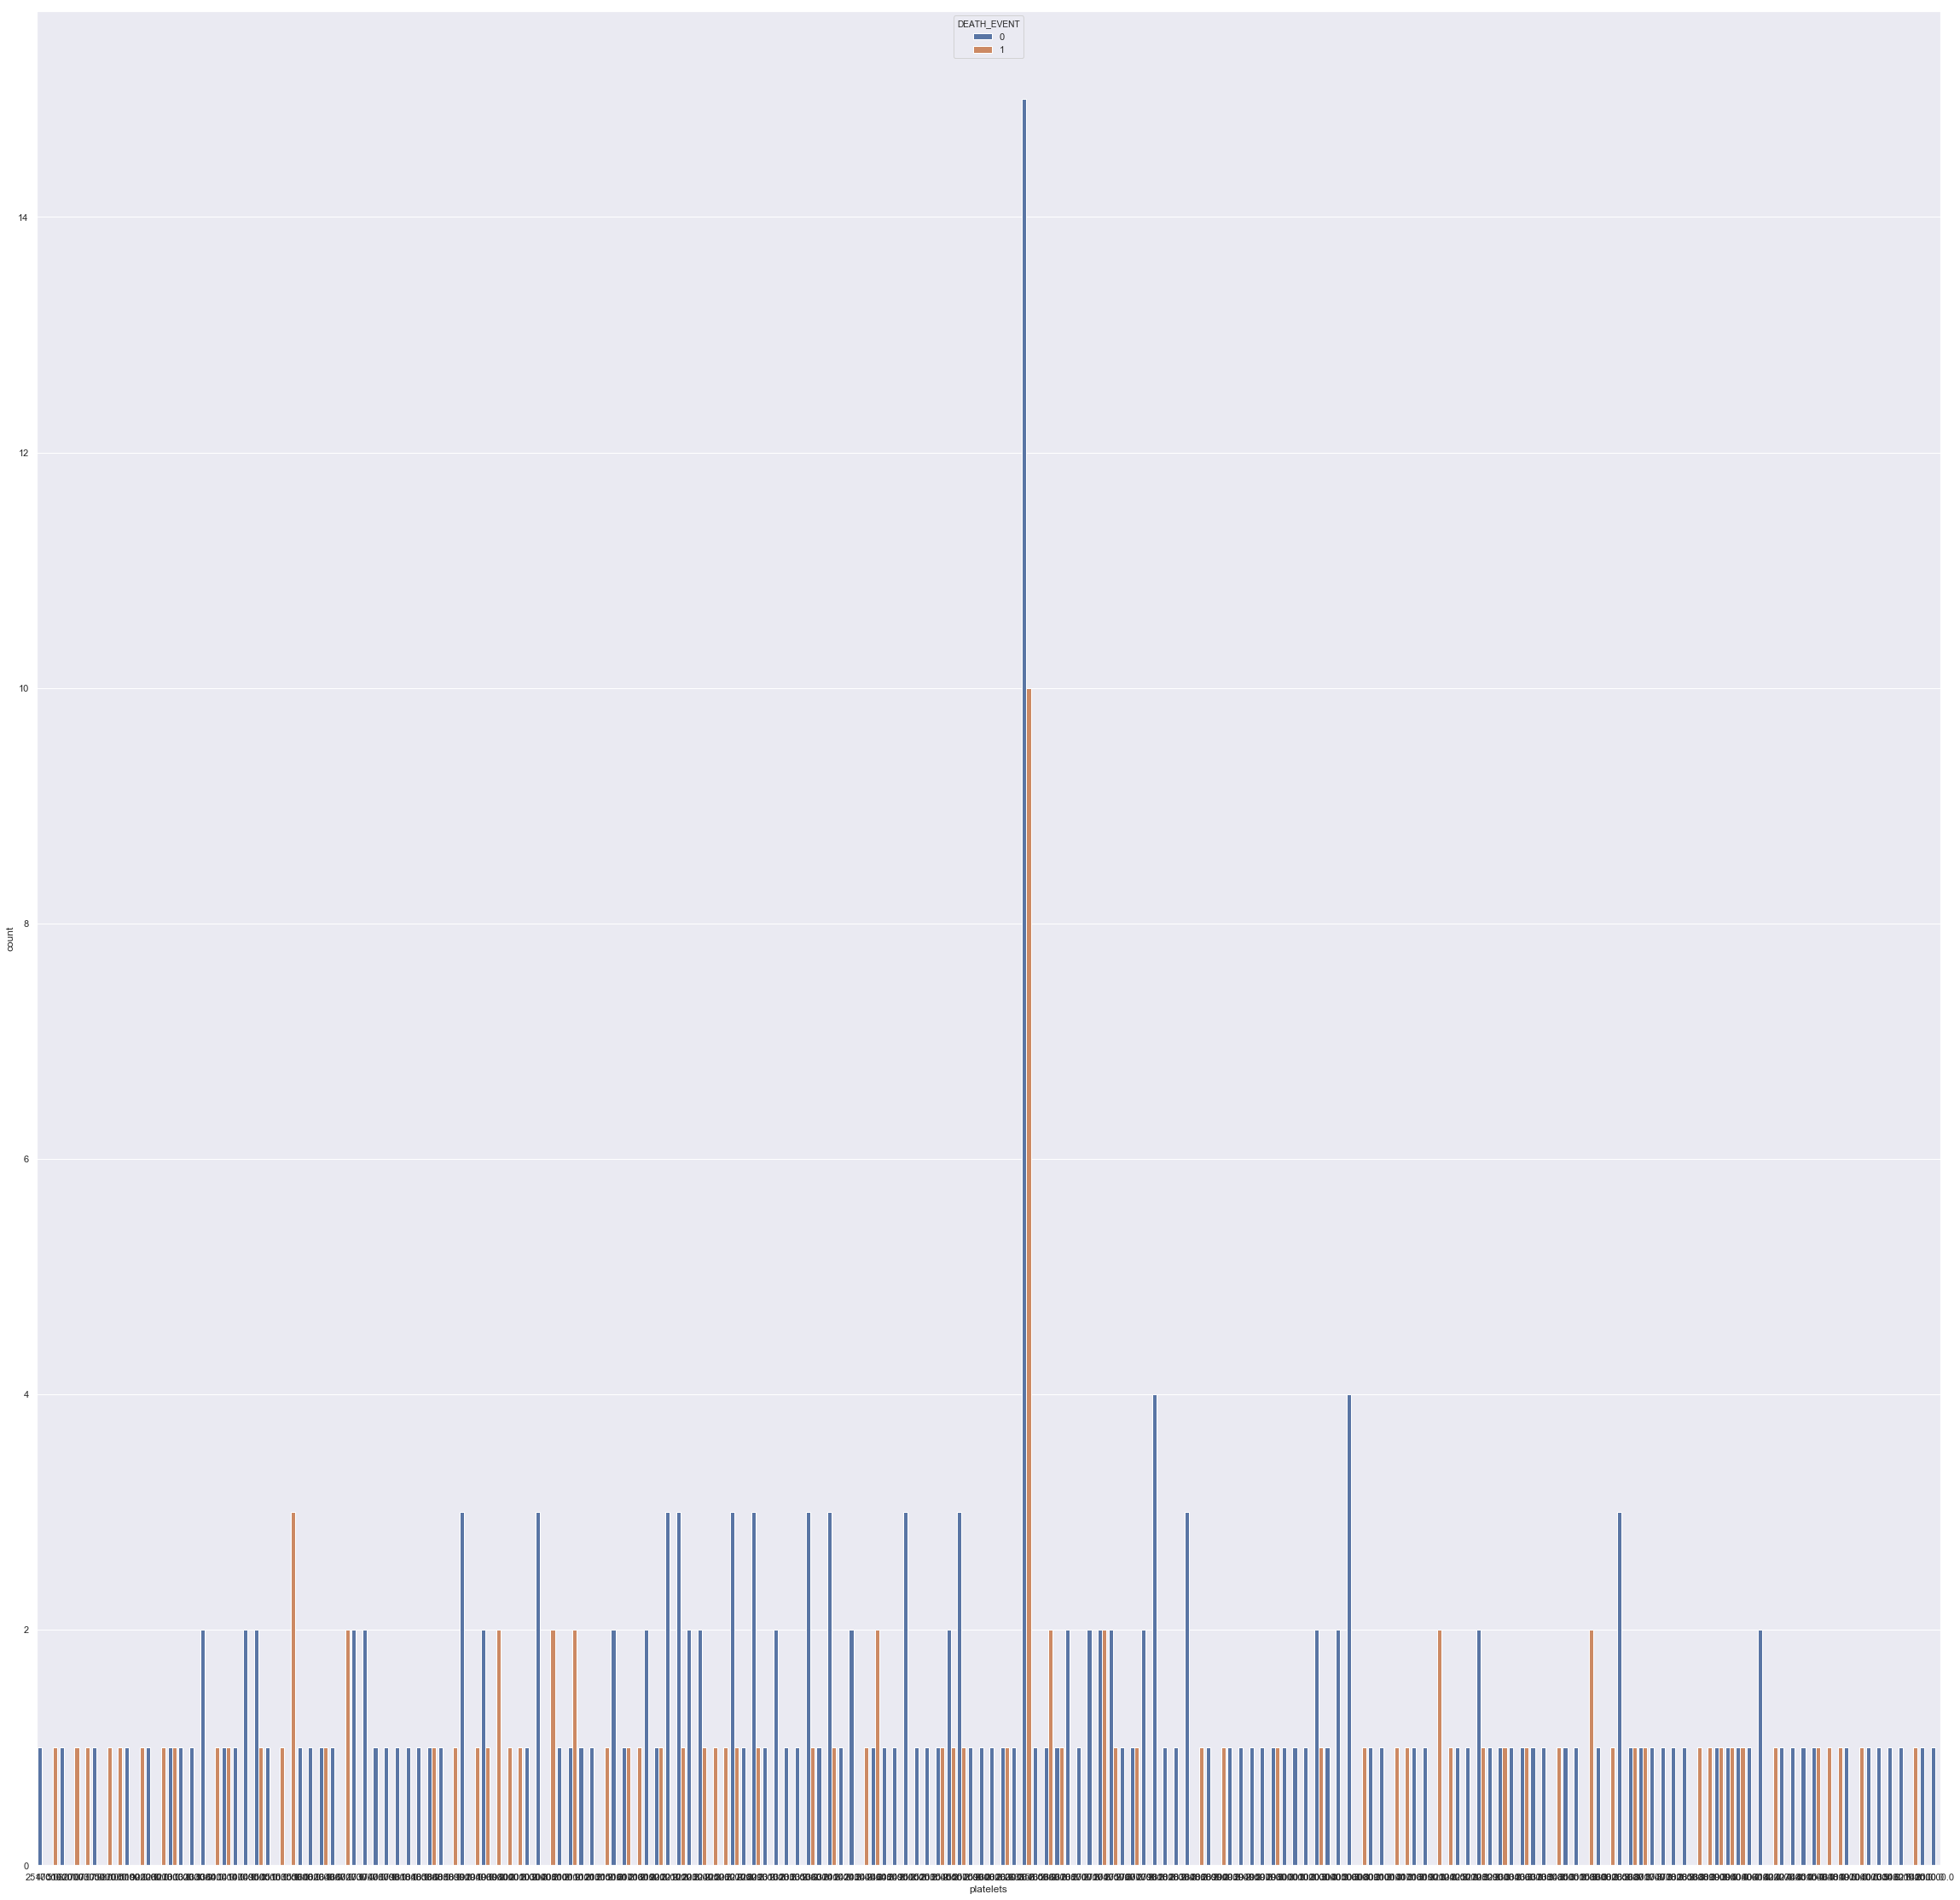

In [608]:
sns.set(rc={'figure.figsize':(40,40)})
sns.countplot("platelets", hue="DEATH_EVENT", data=dataset)

The count plot of platelets with respect to DEATH_EVENT shows that the platelet count does not matter in death due to heart failure.

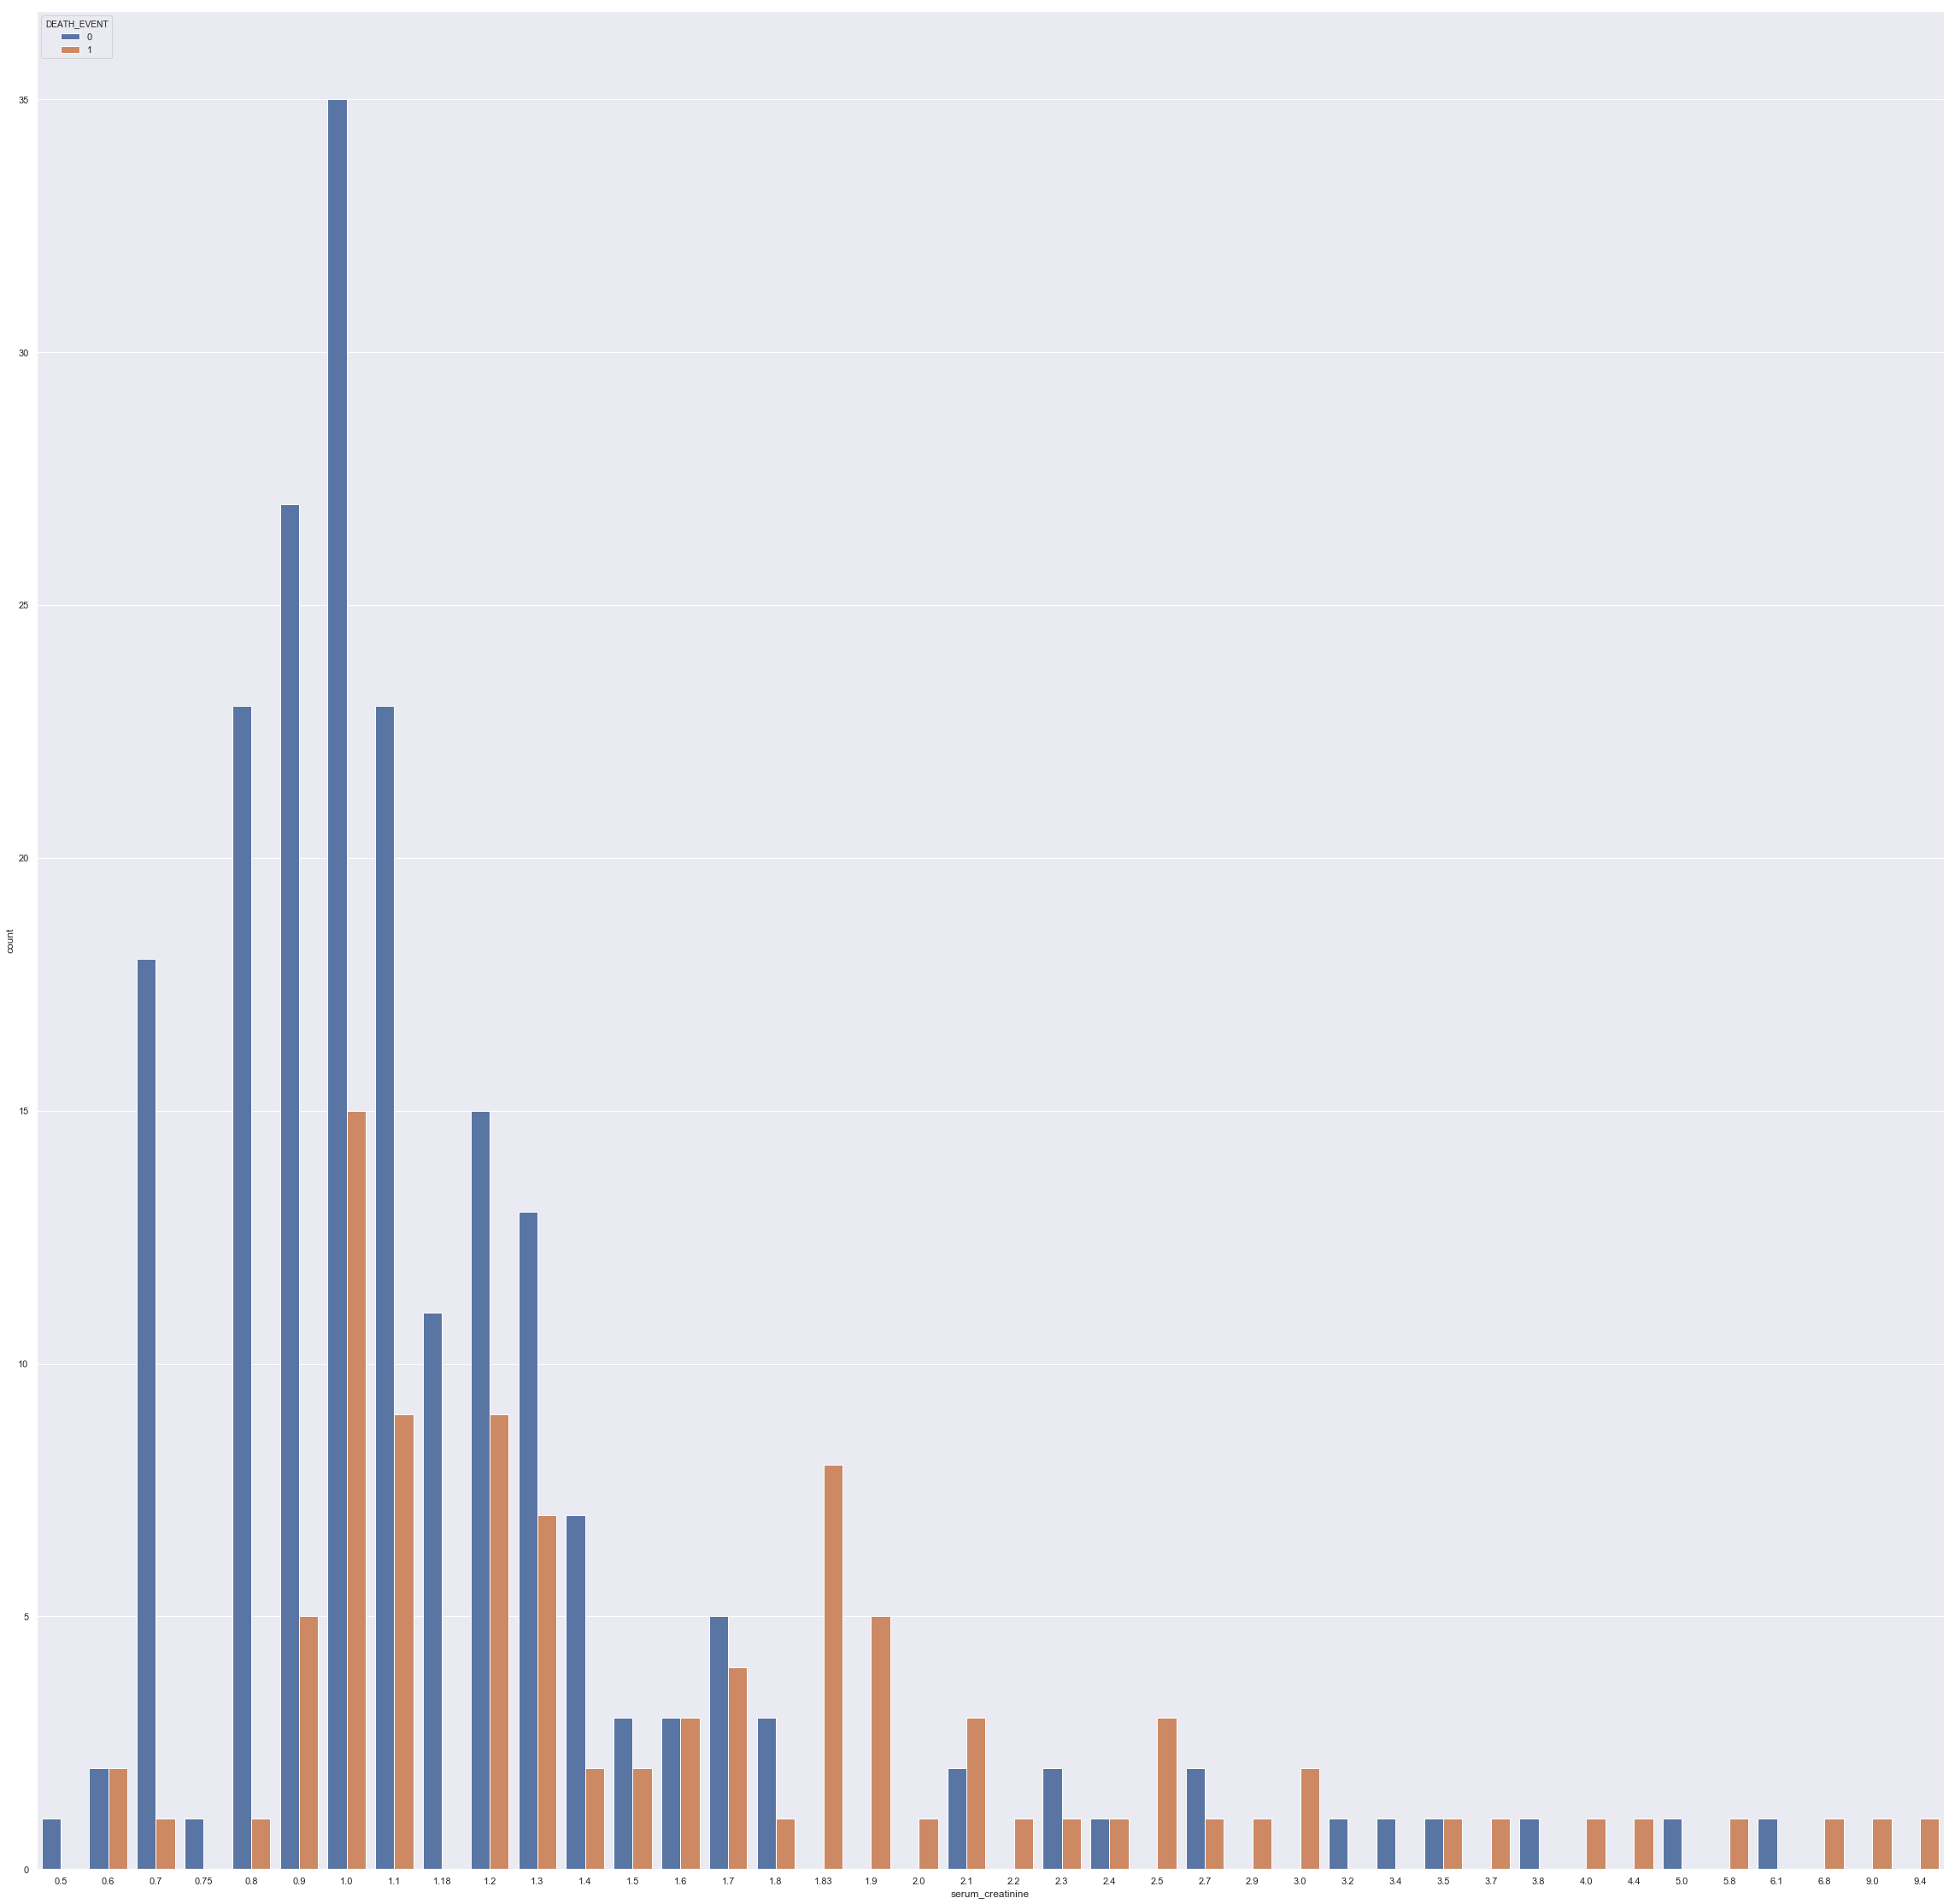

In [609]:
sns.set(rc={'figure.figsize':(40,40)})
sns.countplot("serum_creatinine", hue="DEATH_EVENT", data=dataset)

The count plot of serum_creatinine does depend for the death due to heart failure the only reason being their is clear indication that at certain level its high and at times its low.

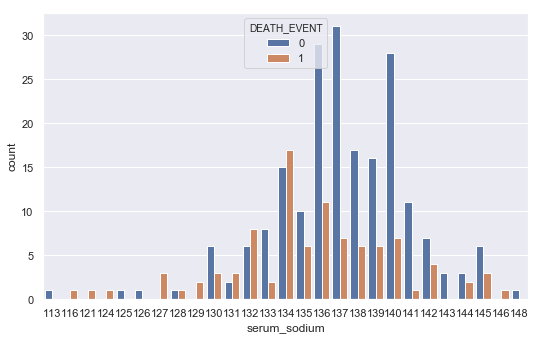

In [610]:
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.countplot("serum_sodium", hue="DEATH_EVENT", data=dataset)

We can see that the amount of serum sodium does depend on the death of a person due to heart failure this is because when the level is low the death rate is higher and vice versa.

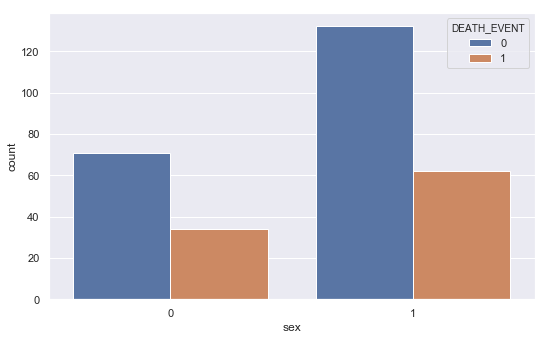

In [611]:
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.countplot("sex", hue="DEATH_EVENT", data=dataset)

The death of a person due to heart failure does not depend on the sex of a person.

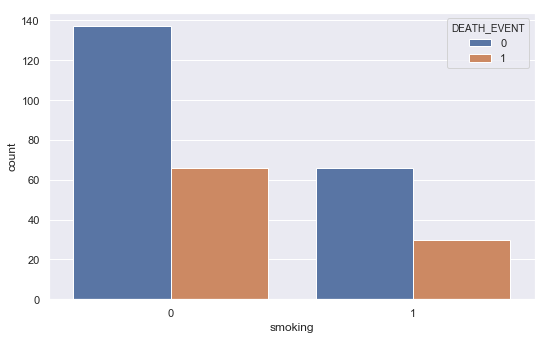

In [612]:
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.countplot("smoking", hue="DEATH_EVENT", data=dataset)

The death of a person due to heart failure does not depend on smoking can clearly be seen.

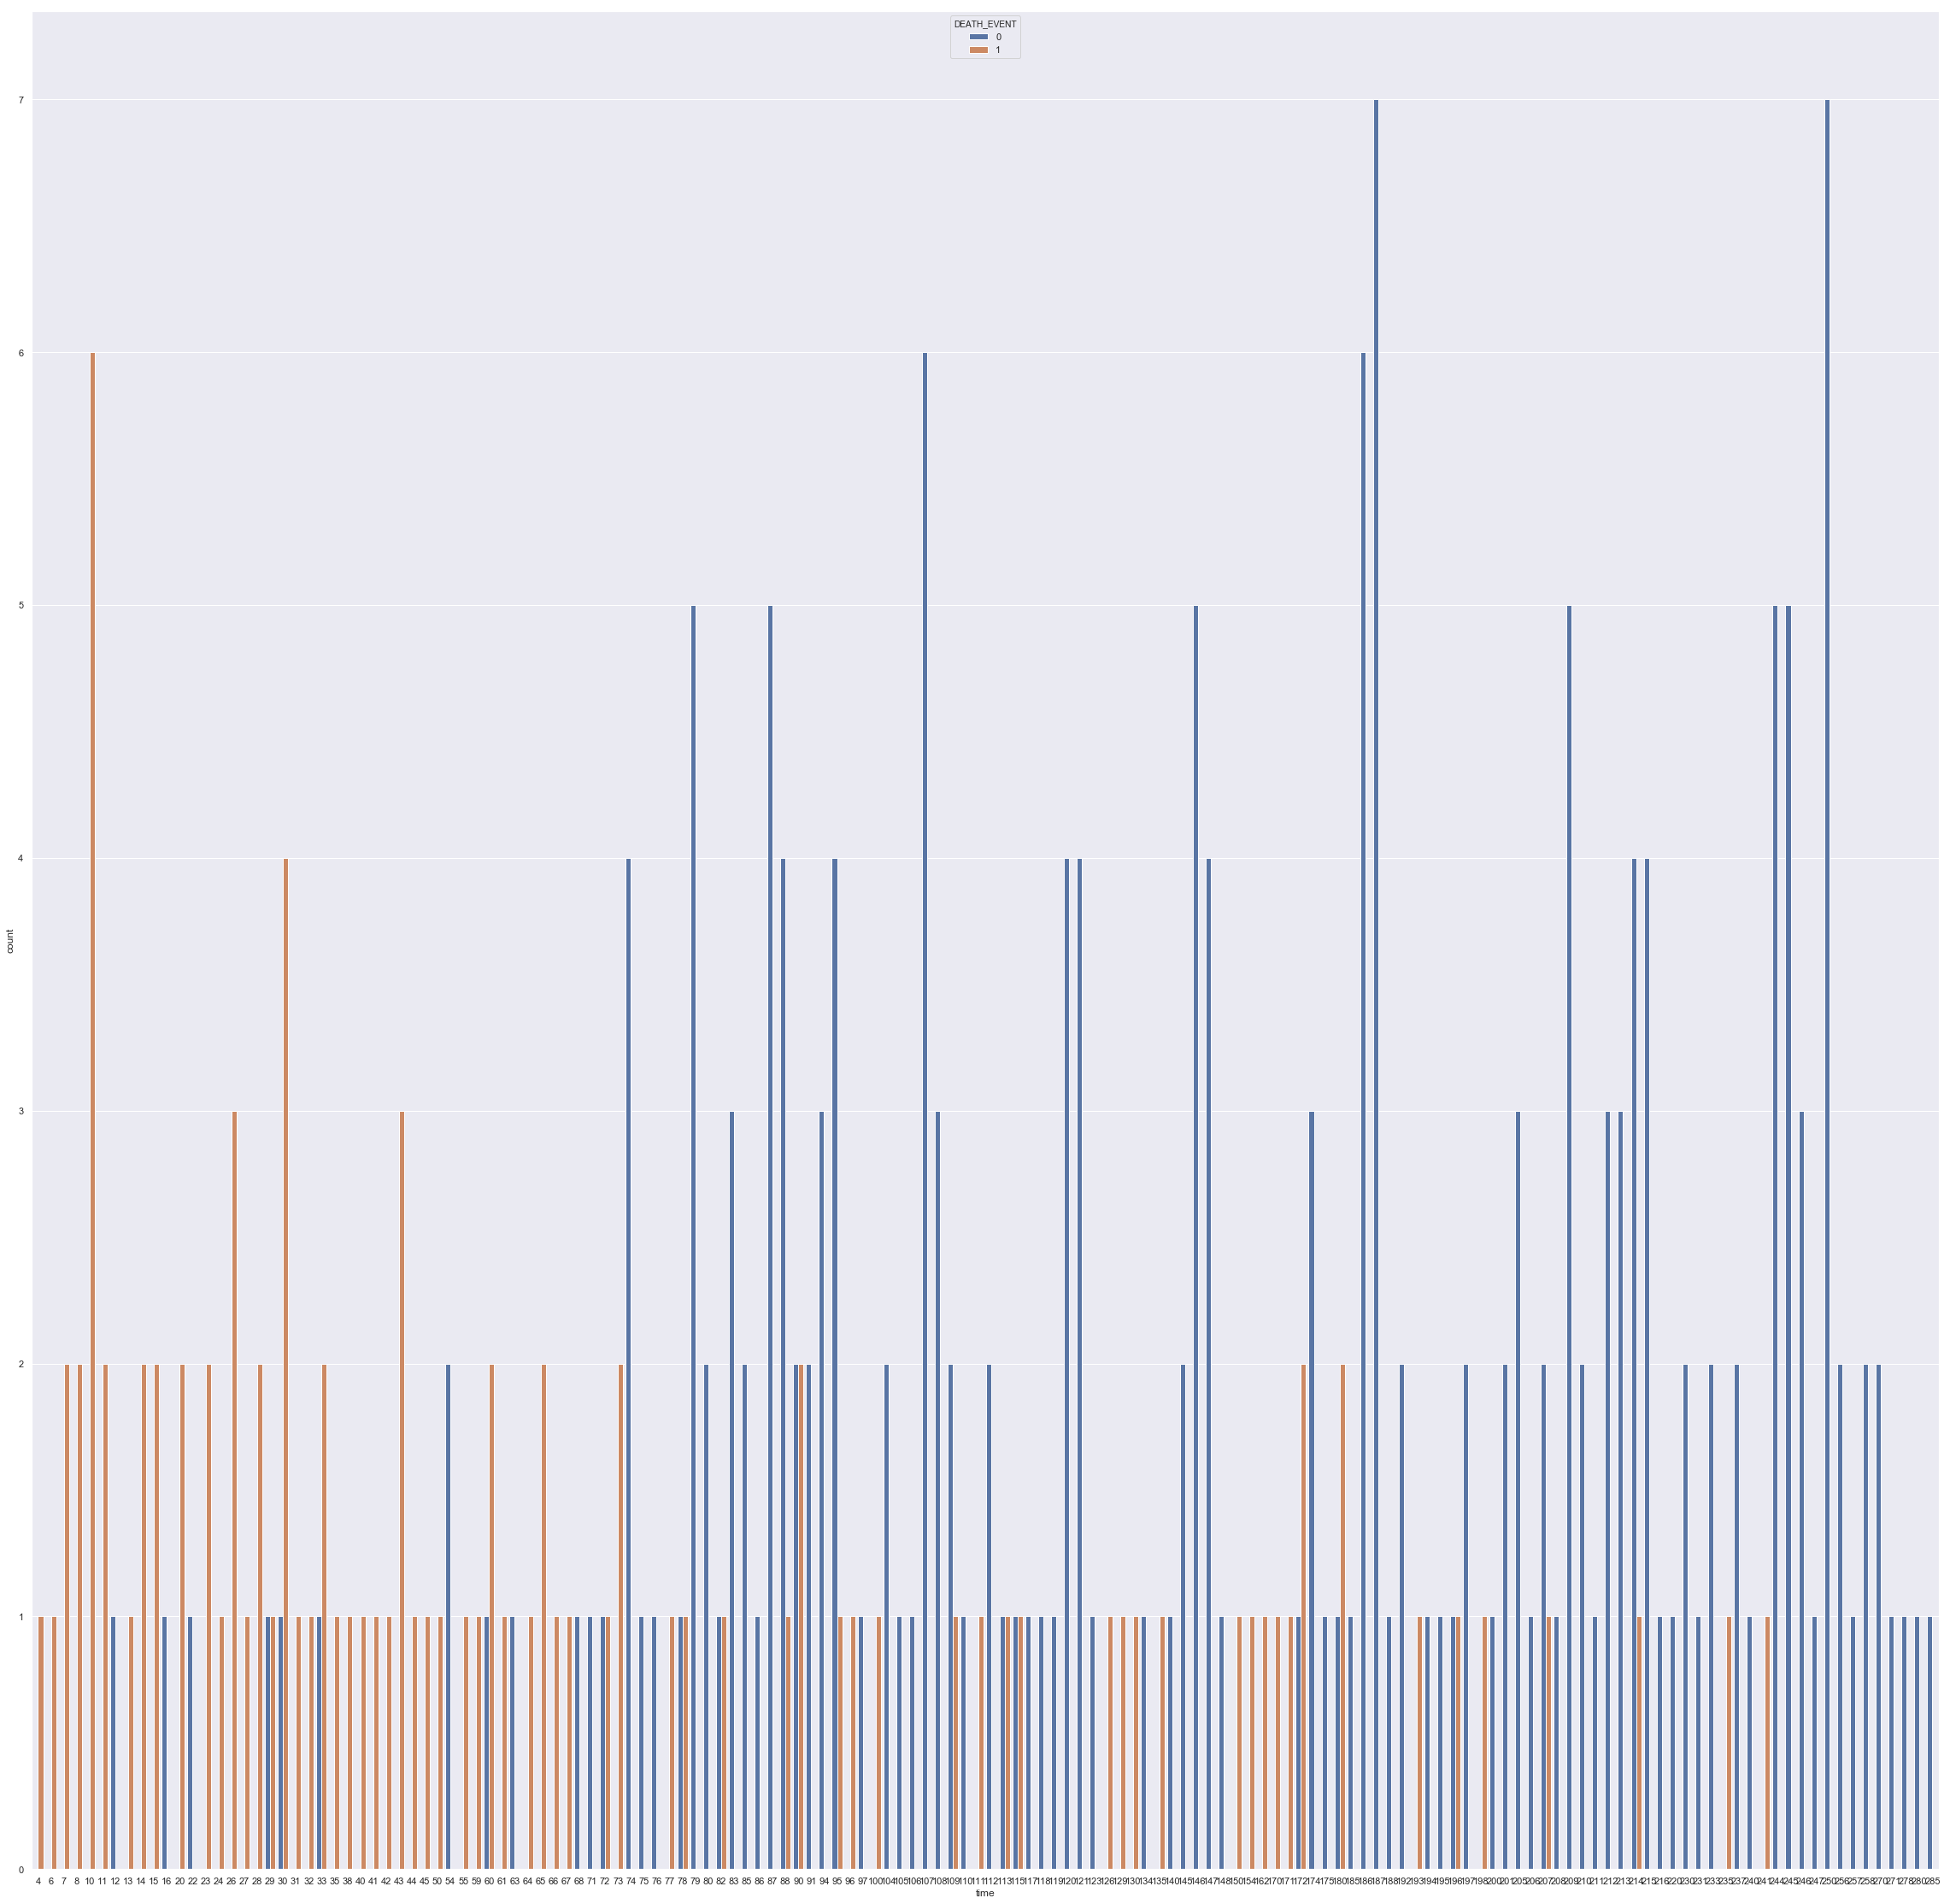

In [613]:
sns.set(rc={'figure.figsize':(40,40)})
sns.countplot("time", hue="DEATH_EVENT", data=dataset)

Time is required for the prediction as in our case the time is big factor as evident from the count plot itself.

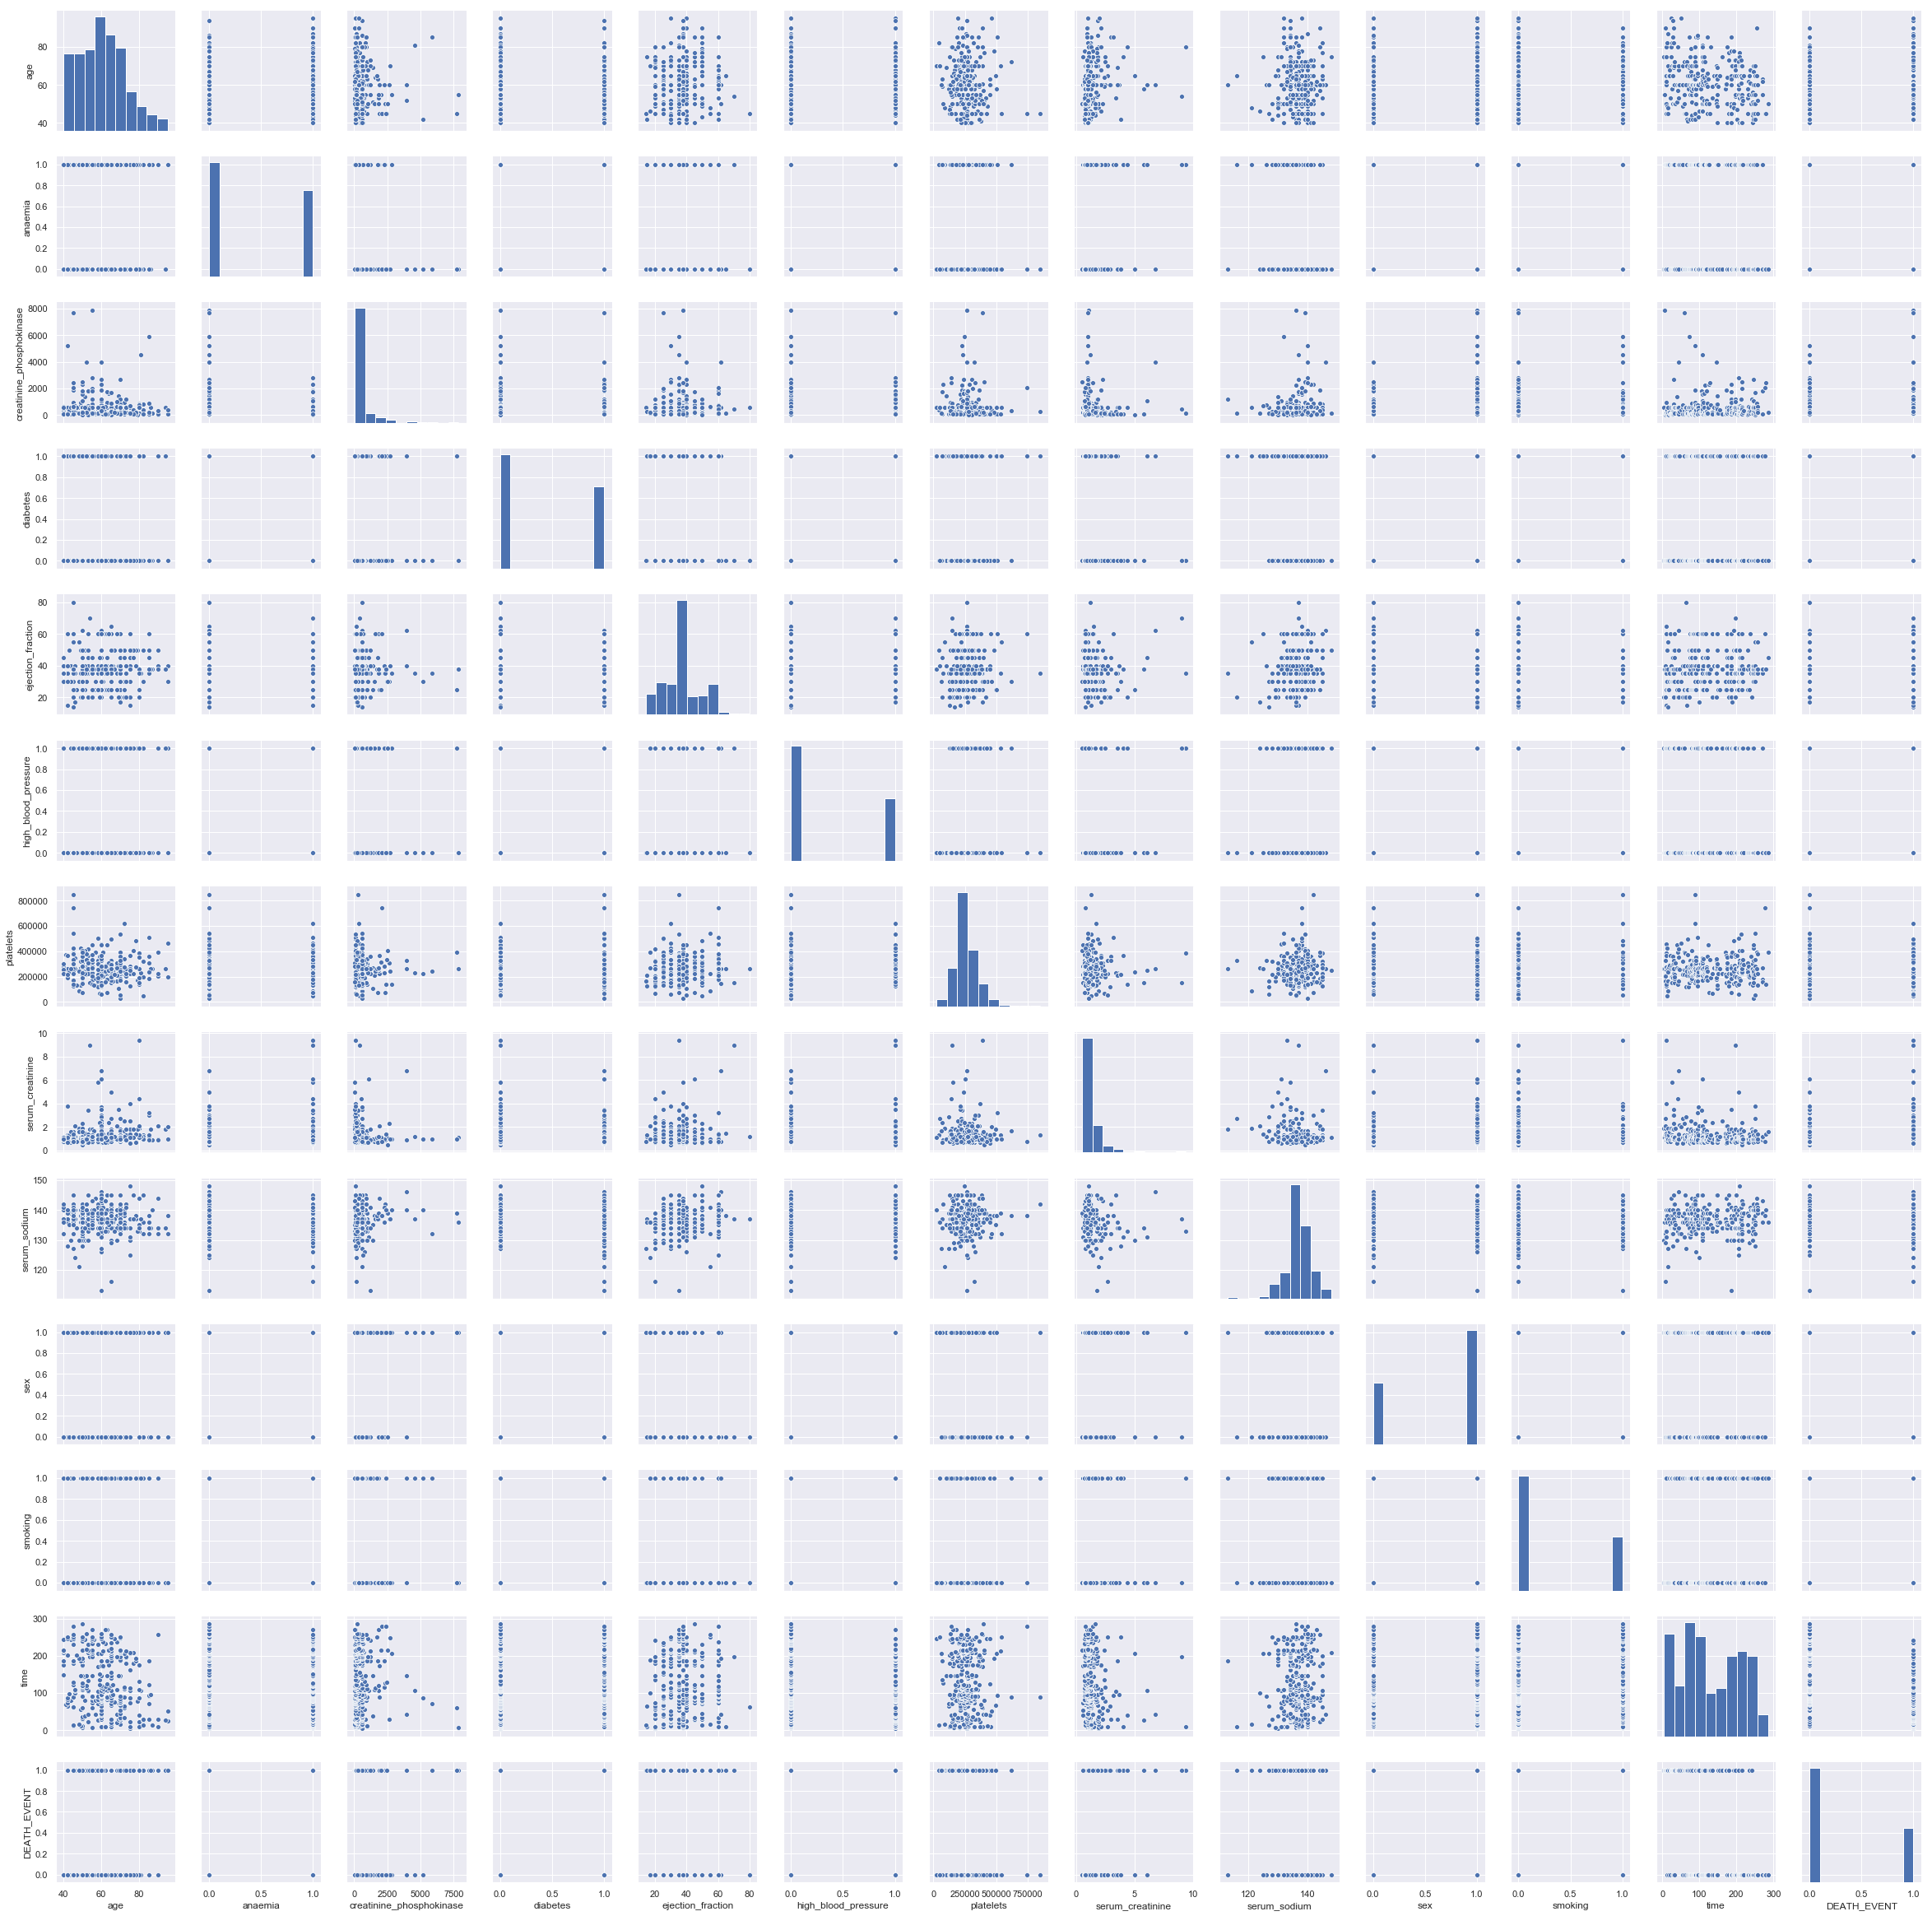

In [614]:
sns.pairplot(dataset)

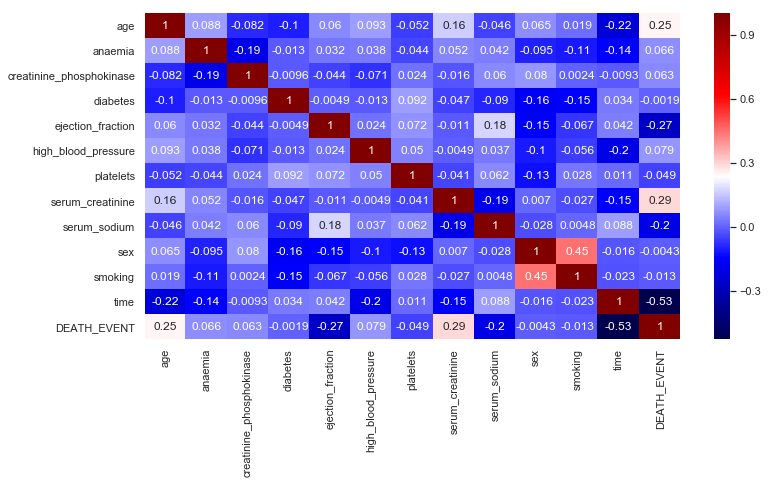

In [615]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),cmap='seismic' , annot = True)

Now lets drop the unnecessary data from the dataset.

In [616]:
dataset.drop('diabetes',axis=1,inplace=True)
dataset.drop('creatinine_phosphokinase',axis=1,inplace=True)
dataset.drop('high_blood_pressure',axis=1,inplace=True)
dataset.drop('sex',axis=1,inplace=True)
dataset.drop('platelets',axis=1,inplace=True)
dataset.drop('smoking',axis=1,inplace=True)

The cleaned dataset looks like this.

In [617]:
dataset.head()

,age,anaemia,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,0,20,1.9,130,4,1
1,55.0,0,38,1.1,136,6,1
2,65.0,0,20,1.3,129,7,1
3,50.0,1,20,1.9,137,7,1
4,65.0,1,20,2.7,116,8,1


In [618]:
dataset.describe()

,age,anaemia,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000
mean,60.833893,0.431438,38.083612,1.39388,136.625418,130.260870,0.32107
std,11.894809,0.496107,11.834841,1.03451,4.412477,77.614208,0.46767
min,40.000000,0.000000,14.000000,0.50000,113.000000,4.000000,0.00000
25%,51.000000,0.000000,30.000000,0.90000,134.000000,73.000000,0.00000
50%,60.000000,0.000000,38.000000,1.10000,137.000000,115.000000,0.00000
75%,70.000000,1.000000,45.000000,1.40000,140.000000,203.000000,1.00000
max,95.000000,1.000000,80.000000,9.40000,148.000000,285.000000,1.00000


## Dividing the dataset into features and label

In [619]:
X = dataset.iloc[:,0:5].values
Y = dataset.iloc[:,-1].values

## Test Train and Split Data

In [620]:
#split the dataset into 80% train and 20% test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=1)

## Logistic Regression

In [621]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [622]:
pred = model.predict(X_test)
a=accuracy_score(Y_test,pred)
print("The accuracy of this prediction of test set is: " + str(a*100)+" %")

The accuracy of this prediction of test set is: 81.66666666666667 %


### The Confusion matrix heat map in Logistic regression

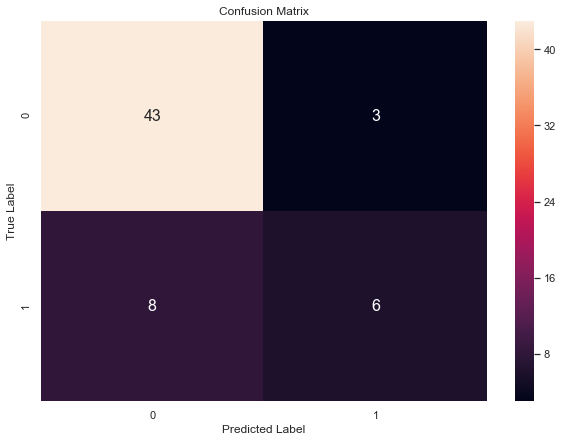

In [623]:
conf_mat = pd.DataFrame(confusion_matrix(Y_test, pred))
fig = plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [624]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        51
           1       0.43      0.67      0.52         9

   micro avg       0.82      0.82      0.82        60
   macro avg       0.68      0.75      0.70        60
weighted avg       0.86      0.82      0.83        60



The classification report for Logistic Regression.

## Decision Tree

In [625]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)
pred = tree.predict(X_test)
a=accuracy_score(Y_test,pred)
print("The accuracy of this prediction of test set is: " + str(a*100)+" %")

The accuracy of this prediction of test set is: 71.66666666666667 %


### The Confusion matrix heat map in Decision Tree

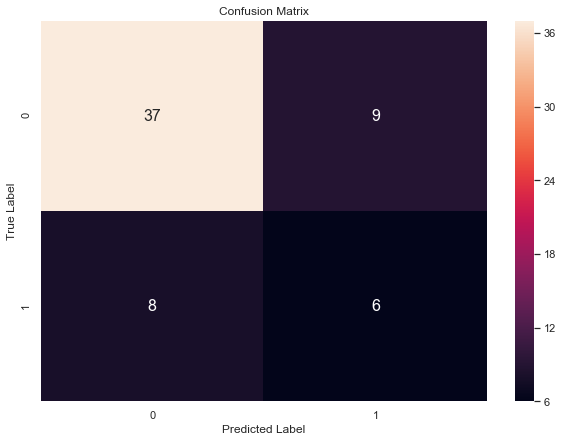

In [626]:
conf_mat = pd.DataFrame(confusion_matrix(Y_test, pred))
fig = plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [627]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        45
           1       0.43      0.40      0.41        15

   micro avg       0.72      0.72      0.72        60
   macro avg       0.62      0.61      0.61        60
weighted avg       0.71      0.72      0.71        60



The classification report for Decision Tree.

## Random Forest Classifier

In [628]:
 from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10)
forest.fit(X_train,Y_train)
pred = forest.predict(X_test)
a=accuracy_score(Y_test,pred)
print("The accuracy of this prediction of test set is: " + str(a*100)+" %")

The accuracy of this prediction of test set is: 83.33333333333334 %


### The Confusion matrix heat map in Random Forest Classifier

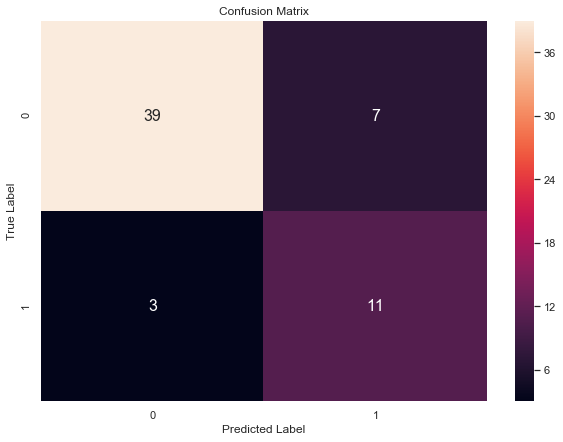

In [629]:
conf_mat = pd.DataFrame(confusion_matrix(Y_test, pred))
fig = plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [630]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.79      0.61      0.69        18

   micro avg       0.83      0.83      0.83        60
   macro avg       0.82      0.77      0.79        60
weighted avg       0.83      0.83      0.83        60



The classification report for Random Forest Classifier.

## Naive Bayes

In [631]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
pred = classifier.predict(X_test)
a = accuracy_score(pred,Y_test)
print("The accuracy of this prediction of test set is: " + str(a*100)+" %")

The accuracy of this prediction of test set is: 78.33333333333333 %


### The Confusion matrix heat map in Naive Bayes

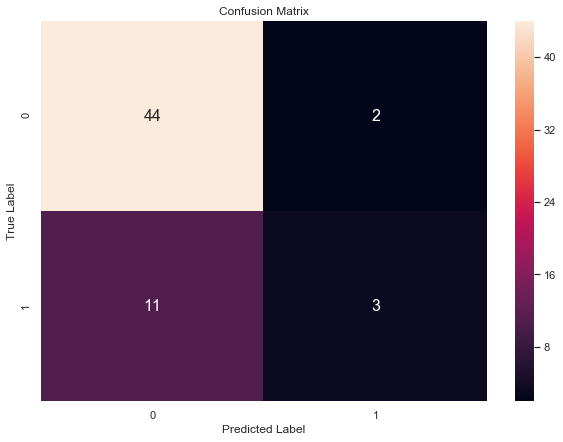

In [632]:
conf_mat = pd.DataFrame(confusion_matrix(Y_test, pred))
fig = plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [633]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        55
           1       0.21      0.60      0.32         5

   micro avg       0.78      0.78      0.78        60
   macro avg       0.59      0.70      0.59        60
weighted avg       0.89      0.78      0.82        60



The classification report for Naive Bayes.

## Observation

Finally it can be concluded that Random Forest Classifier is best in predicting the death of a person due to heart failure. Logistic regression can also be used for prediction as the accuracy is also good in this algorithm. Decision Tree and Naive Bayes algorithm are not prefered in this prediction for the prediction is not good compared to the other two.